# Piecewise linear interpolation

A core problem in numerical analysis is the _approximation or recovery of functions_ from limited data. Often we can only evaluate a function at a few points, and we want to infer the rest of the function—i.e., to evaluate the function at any other input value. A very useful approach to this problem is **interpolation**.

Use cases for interpolation:
- Quadrature (evaluating integrals)
- Representing solutions of differential equations
- Graphics and computer-aided design (e.g., compact representations of curves and surfaces)
- Data analysis (though be careful of noise!)
- Much more!

# Outline of the lecture
- The interpolation problem, in general! <!-- What should errors depend on? Intuitively, error depends on input information (point spacing), what you do with this information (our particular interpolation scheme), _and_ on some properties of the unknown function. -->
- First cut: Piecewise linear interpolation. Code example.
- Error of piecewise linear interpolation <!-- Write out proof. Error locally, error worst case. --> 
- Piecewise linear interpolants as sums of hat functions ("cardinal functions")

# Piecewise linear interpolation, demo

In [1]:
"""
    hatfun(t, k)

Create a piecewise linear hat function, where `t` is a
vector of n+1 interpolation nodes and `k` is an integer in 0:n
giving the index of the node where the hat function equals one.
"""
function hatfun(t, k)
    n = length(t) - 1
    return function (x)
        if k > 0 && t[k] ≤ x ≤ t[k+1]
            return (x - t[k]) / (t[k+1] - t[k])
        elseif k < n && t[k+1] ≤ x ≤ t[k+2]
            return (t[k+2] - x) / (t[k+2] - t[k+1])
        else
            return 0
        end
    end
end

hatfun

In [2]:
"""
    plinterp(t, y)

Construct a piecewise linear interpolating function for data values in
`y` given at nodes in `t`.
"""
function plinterp(t, y)
    n = length(t) - 1
    H = [hatfun(t, k) for k in 0:n]
    return x -> sum(y[k+1] * H[k+1](x) for k in 0:n)
end

plinterp

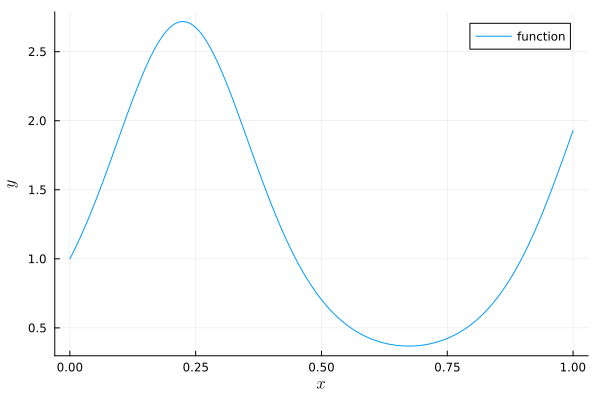

In [3]:
using Plots
using LaTeXStrings

f = x -> exp(sin(7x))

plot(f, 0, 1, label="function", xlabel=L"x", ylabel=L"y")

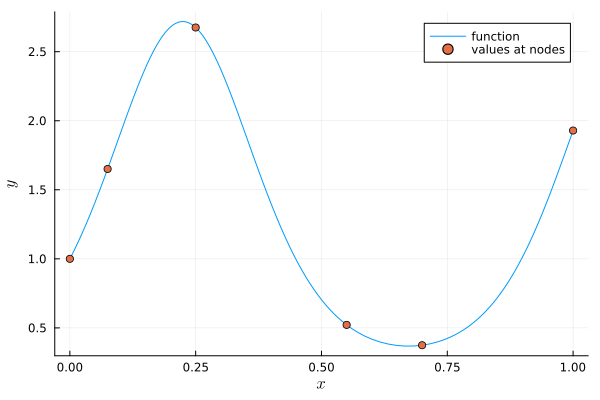

In [4]:
t = [0, 0.075, 0.25, 0.55, 0.7, 1]    # nodes
# t = 0:0.01:1
y = f.(t)                             # function values
scatter!(t, y, label="values at nodes")

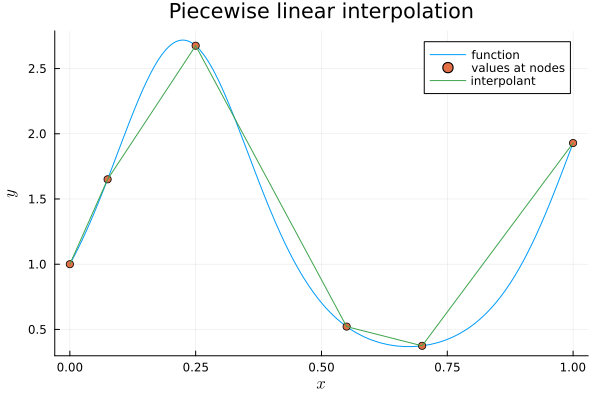

In [5]:
p = plinterp(t, y)
plot!(p, 0, 1, label="interpolant", title="Piecewise linear interpolation")

# Convergence of piecewise linear interpolation
What happens to the error $\| f - p \|_\infty = \max_{x} | f(x) - p(x) |$ as we take $\Delta x \to 0$?


In [6]:
using LinearAlgebra
f = x -> exp(sin(7x))
x = range(0, 1, 10001)  # evaluate f(x) - p(x) at many points
# n = @. round(Int, 10^(1:0.25:3.5))
n = @. round(Int, 10^(0.5:1:3.5))
maxerr = zeros(length(n))
for (k, n) in enumerate(n)
    t = (0:n) / n    # interpolation nodes
    p = plinterp(t, f.(t))
    err = @. f(x) - p(x)
    maxerr[k] = norm(err, Inf) # find the largest-ish error in the domain 
end

In [7]:
maxerr

4-element Vector{Float64}:
 1.0425468032837497
 0.01603818294283821
 0.00016670038269950282
 1.6652115903958986e-6

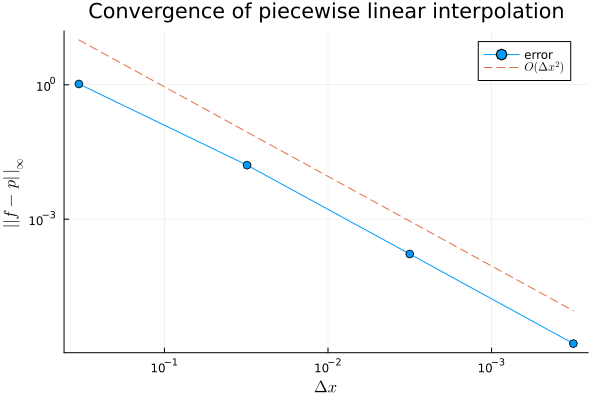

In [8]:
h = @. 1 / n
order2 = @. 10 * (h / h[1])^2

plot(h, maxerr, m=:o, label="error", xflip=true)
plot!(h, order2;
    l=:dash,  label=L"O(\Delta x^2)",
    xaxis=(:log10, L"\Delta x"),  yaxis=(:log10, L"|| f-p\, ||_\infty"),
    title="Convergence of piecewise linear interpolation")

# Basis functions for piecewise linear interpolation
An alternative way of representing the PL interpolant is as a _linear combination_ of _basis functions_. Basis function representations occur throughout numerical analysis, and this viewpoint will thus be very useful going forward. 

In [9]:
t = [0, 0.55, 0.7, 1]
# t = 0:0.1:1;

4-element Vector{Float64}:
 0.0
 0.55
 0.7
 1.0

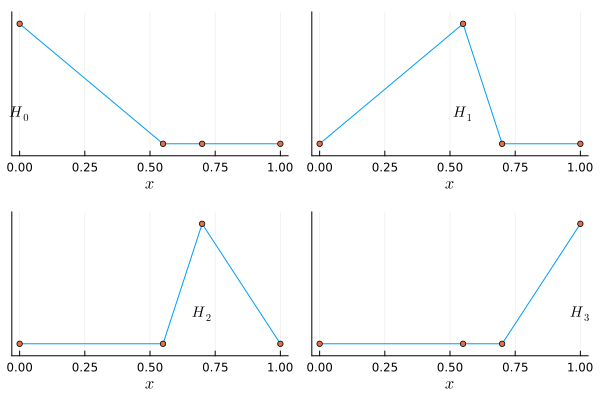

In [10]:
using Plots
plt = plot(layout=(2, 2),  legend=false, # legend=:top,
    xlabel=L"x",  ylims=[-0.1, 1.1],  ytick=[])
for k in 0:3
    Hₖ = hatfun(t, k)
    plot!(Hₖ, 0, 1, subplot=k + 1)
    scatter!(t, Hₖ.(t), m=3, subplot=k + 1)
    annotate!(t[k+1], 0.25, text(latexstring("H_$k"), 10), subplot=k+1)
end
plt

Now go back and look at the `plinterp` function above and how it was built!